In [56]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import datetime

url = 'https://bitinfocharts.com/comparison/ethereum-tweets.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
scripts = soup.find_all('script')


In [121]:
def parse_strlist(sl):
    clean = re.sub("[\[\],\s]","",sl)
    splitted = re.split("[\'\"]",clean)
    values_only = [s for s in splitted if s != '']
    return values_only

for script in scripts:
    if 'd = new Dygraph(document.getElementById("container")' in str(script):
        StrList = str(script)
        StrList = '[[' + StrList.split('[[')[-1]
        StrList = StrList.split(']]')[0] +']]'
        StrList = StrList.replace("new Date(", '').replace(')','')
        dataList = parse_strlist(StrList)

date = []
tweet = []
for each in dataList:
    if (dataList.index(each) % 2) == 0:
        date.append(each)
    else:
        if each=='null':
            tweet.append(None)
        else:
            tweet.append(int(each))
        

df = pd.DataFrame(list(tweet), columns=["Tweets"], index=date)
df.index = pd.to_datetime(df.index)

df.to_csv('tweet_volume.csv')

In [114]:
df

,Tweets
2016-03-16,1185
2016-03-17,1211
2016-03-18,1123
2016-03-19,943
2016-03-20,1304
...,...
2021-06-12,26489
2021-06-13,26452
2021-06-14,37817
2021-06-15,34658


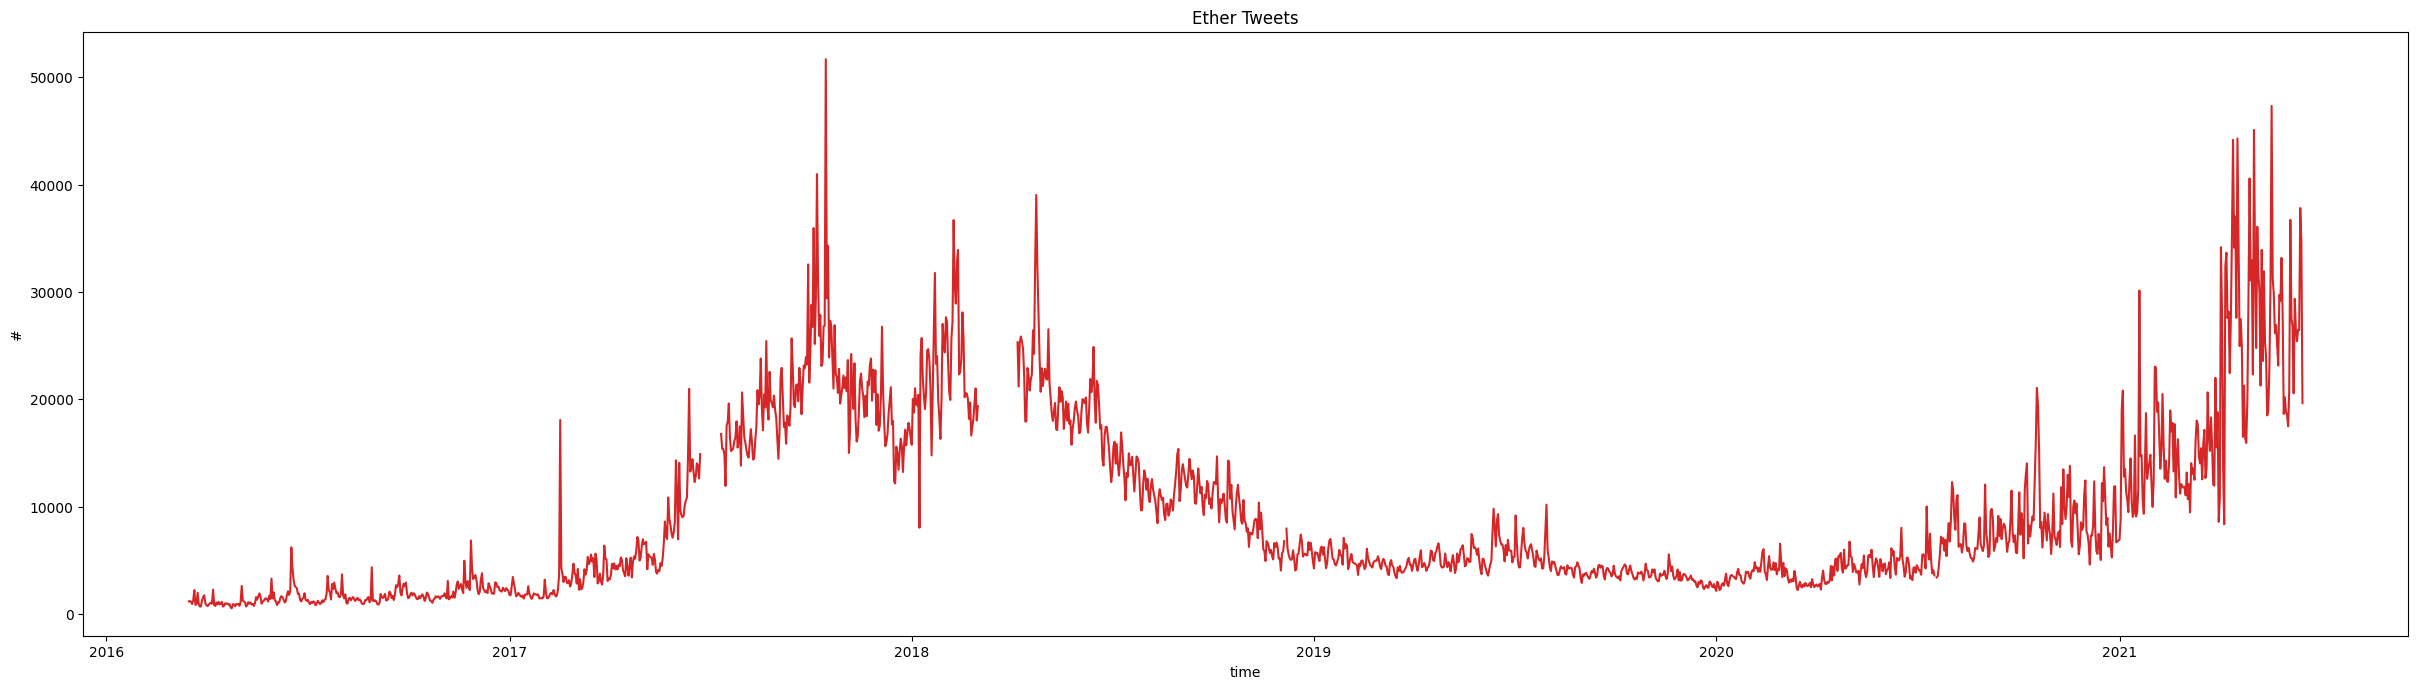

In [120]:
plt.figure(figsize=(30,8), dpi=100)
plt.plot(df['Tweets'], color='tab:red')
plt.gca().set(title='Ether Tweets', xlabel='time', ylabel='#')
plt.show()

In [104]:
x=df.loc['2017.10.15']
type(x)

pandas.core.series.Series

In [103]:
x=df.values
x

array([['1185'],
       ['1211'],
       ['1123'],
       ...,
       ['37817'],
       ['34658'],
       ['19650']], dtype=object)

In [43]:
str(scripts[4])

'<script>var gIsLog = 0;var gIsZoomed = "";var d;function fixSize(){var s = 403;$("#container").height(($(window).height()-s > 200) ? $(window).height()-s : 200);}$(function() { $(".average").each(function() { $(this).html(\'Average \'+$(this).html()); }); $(".simple").each(function() { $(this).html(\'Simple \'+$(this).html()); }); $(".exponential").each(function() { $(this).html(\'Exponential \'+$(this).html()); }); $(".weighted").each(function() { $(this).html(\'Weighted \'+$(this).html()); }); fixSize(); $(window).resize(function() { fixSize(); }); d = new Dygraph(document.getElementById("container"),[[new Date("2016/03/16"),1185],[new Date("2016/03/17"),1211],[new Date("2016/03/18"),1123],[new Date("2016/03/19"),943],[new Date("2016/03/20"),1304],[new Date("2016/03/21"),2233],[new Date("2016/03/22"),859],[new Date("2016/03/23"),944],[new Date("2016/03/24"),1982],[new Date("2016/03/25"),927],[new Date("2016/03/26"),712],[new Date("2016/03/27"),716],[new Date("2016/03/28"),1298],[new